None


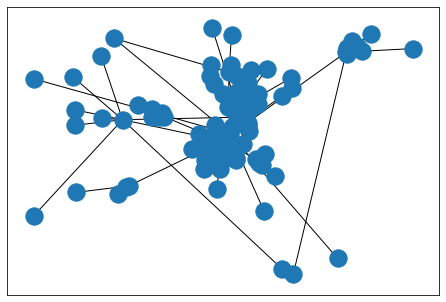

In [41]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

global minVal,maxVal

class GCoeffience(object):
    def __init__(self,fpath,rou):
        self.fpath = fpath
        self.rou = rou
        
        self.rawData=self.getData()
        
        self.node_size=self.rawData.mean(axis=1)*400/self.rawData.mean(axis=1).sum()
        
        self.labels=self.rawData.index.values
        
        self.resData=pd.DataFrame()
        
        self.outData,self.relation=self.getLoopData()
        
    def getData(self):
        data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
        return data
    
    def calCoef(self,rdata):
        dval=minVal+rou*maxVal/(rdata+rou*maxVal)
        return dval
      
    def getLoopData(self):
        global minVal,maxVal
        self.resData.reindex=self.rawData.index
        columns=self.rawData.index.values

        rows,cols=self.rawData.shape
        for i in range(rows):
            normData=self.rawData/self.rawData.iloc[i]
            absData=abs(normData-normData.iloc[i])
            maxVal=max(absData.max())
            minVal=min(absData.min())

            glxs=absData.apply(lambda row:self.calCoef(row))
            self.resData[columns[i]]=glxs.mean(axis=1)
    #         print(glxs.mean(axis=1))
    #     dataw=df.as_matrix()
        dataT=self.resData.values.T
        relation=(self.resData.values+dataT)/2
        newdf=pd.DataFrame(dataT,columns=columns)
        newdf.index=self.rawData.index
#         print(newdf)
        return newdf,np.triu(relation)

# nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])


class CyParseModel(object):
    def __init__(self,origPath,outPath):
        self.fpath=origPath
        self.outpath=outPath
        
        self.NodesJson=[]
        self.EdgesJson=[]
        self.CatsJson=[]
        
        self.rawData=self.getData()
        self.cy_weight_data,self.hy_weight_data,self.xl_weight_data=self.node_weight()
        
        self.total_cy_dict,self.total_dl_dict=self.get_cy_data_no(self)
        
    def getData(self):
        data=pd.read_csv(self.fpath,encoding='utf-8_sig')
        prcData=data.drop_duplicates()
        return prcData
    
    def node_weight(self):
        hy_weight_data={}
        cy_weight_data={}
        xl_weight_data={}
        min_ptcs=rawData[u'企业数量'].groupby([self.rawData['行业大类']]).sum().min()

        cy_data=(rawData[u'企业数量'].groupby([self.rawData['产业类别']]).sum()/min_ptcs).apply(lambda row:round(row,3))
        hy_data=(rawData[u'企业数量'].groupby([self.rawData['行业大类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
        xl_data=(rawData[u'企业数量'].groupby([self.rawData['行业小类']]).sum()/min_ptcs).apply(lambda row:round(row,3))

        cy_weight_data=dict(cy_data)
        hy_weight_data=dict(hy_data)
        xl_weight_data=dict(xl_data)

        return cy_weight_data,hy_weight_data,xl_weight_data
    
    def get_cy_data_width(self):
        total_cy_dict=defaultdict(dict)
        total_dl_dict=defaultdict(dict)

        min_ptcs=self.rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()

        hy_grpData=self.rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

        cy_total=sum(list(self.cy_weight_data.values()))
        hy_total=sum(list(self.hy_weight_data.values()))
        xl_total=sum(list(self.xl_weight_data.values()))

        for (dl,xl),val in hy_grpData:
            tem_dict={}
            tem_dict['weight']=round(val.values[0]/min_ptcs,3)
            tem_dict['width']=round(self.xl_weight_data[xl]*10000/xl_total)
            total_dl_dict[dl][xl]=tem_dict
            total_dl_dict[dl]['width']=round(self.hy_weight_data[dl]/hy_total,3)
            del tem_dict
            
        cy_grpData=self.rawData[u'企业数量'].groupby([self.rawData['产业类别'],self.rawData['行业大类']])

        for (cy,cdl),val in cy_grpData:
            tem_dict={}
            tem_dict['weight']=round(val.values[0]/min_ptcs,3)        
            total_cy_dict[cy][cdl]=tem_dict
            total_cy_dict[cy]['width']=round(self.cy_weight_data[cy]/cy_total,3)
            total_cy_dict[cy]['weight']=round(self.cy_weight_data[cy]/min_ptcs,3)

        return total_cy_dict,total_dl_dict
    
    def get_cy_data(self):
        total_cy_dict=defaultdict(dict)
        total_dl_dict=defaultdict(dict)

        min_ptcs=self.rawData[u'企业数量'].groupby([self.rawData['行业大类']]).sum().min()

        hy_grpData=self.rawData[u'企业数量'].groupby([self.rawData['行业大类'],self.rawData['行业小类']])

        for (dl,xl),val in hy_grpData:
            tem_dict={}
            tem_dict['weight']=round(val.values[0]/min_ptcs,4)
            tem_dict['width']=round(xl_weight_data[xl]*10/hy_weight_data[dl],4)
            total_dl_dict[dl][xl]=tem_dict
            total_dl_dict[dl]['weight']=round(self.hy_weight_data[dl]/min_ptcs,4)

            del tem_dict
            
        cy_grpData=self.rawData[u'企业数量'].groupby([self.rawData['产业类别'],self.rawData['行业大类']])

        for (cy,cdl),val in cy_grpData:
            tem_dict={}
            tem_dict['weight']=round(val.values[0]/min_ptcs,3)        
            total_cy_dict[cy][cdl]=tem_dict
            
        return total_cy_dict,total_dl_dict
    
    def genNode(self):
        for (cy,cval) in self.total_cy_dict.items():
            tem_dict={}
            tem_dict["name"]=cy
            pass
    
    def genNodeJson(self,typeData):
        for (cy,cval) in typeData.items():
            for (dl,dval) in cval.items():
                pass
    
    def genJsonFile(self):
        with open(self.outpath,'w',encoding='utf-8_sig',ensure_ascii=False) as f:
            json.dump(self.dJson,f)
            
class GenJson():
    def __init__(self,outPath):
        self.dJson=dataJson
        self.outpath=outPath

        self.NodesJson=[]
        self.EdgesJson=[]
        self.CatsJson=[]
        
        self.GDJson=self.NodeJson()

    def genNodeJson(self,typeData):
        for (cy,cval) in typeData.items():
            for (dl,dval) in cval.items():
                pass
    
    def genJsonFile(self):
        with open(self.outpath,'w',encoding='utf-8_sig',ensure_ascii=False) as f:
            json.dump(self.dJson,f)


def create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data):
    G=nx.from_dict_of_dicts(total_cy_dict)

#     pos=nx.spring_layout(G)
#     nx.draw_networkx(G,pos,with_labels=True)
    nx.draw(G)
    H=nx.from_dict_of_dicts(total_dl_dict)
    G.add_edges_from(H.edges(data=True))
#     print(H.edges(data=True))
    nx.draw(G)
#     nx.draw_networkx(G,pos,with_labels=False)
#     nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',
#                            alpha=0.8,width=[v['weight'] for (r,c,v) in G.edges(data=True)])

    plt.axis('on')
    plt.show()


if __name__=="__main__":
    filpath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    rawData=getData(filpath)
    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    total_cy_dict,total_dl_dict = get_cy_data(rawData)
    import json
    with open(r'C:\Users\Administrator\Desktop\tpTest\tst.json','w',encoding='gb2312') as f:
        print(json.dump(total_cy_dict,f,ensure_ascii=False))
    create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data)

In [52]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

global minVal,maxVal

class GCoeffience(object):
    def __init__(self,fpath,rou):
        self.fpath = fpath
        self.rou = rou
        
        self.rawData=self.getData()
        
        self.node_size=self.rawData.mean(axis=1)*400/self.rawData.mean(axis=1).sum()
        
        self.labels=self.rawData.index.values
        
        self.resData=pd.DataFrame()
        
        self.outData,self.relation=self.getLoopData()
        
    def getData(self):
        data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
        return data
    
    def calCoef(self,rdata):
        dval=minVal+rou*maxVal/(rdata+rou*maxVal)
        return dval
      
    def getLoopData(self):
        global minVal,maxVal
        self.resData.reindex=self.rawData.index
        columns=self.rawData.index.values

        rows,cols=self.rawData.shape
        for i in range(rows):
            normData=self.rawData/self.rawData.iloc[i]
            absData=abs(normData-normData.iloc[i])
            maxVal=max(absData.max())
            minVal=min(absData.min())

            glxs=absData.apply(lambda row:self.calCoef(row))
            self.resData[columns[i]]=glxs.mean(axis=1)
    #         print(glxs.mean(axis=1))
    #     dataw=df.as_matrix()
        dataT=self.resData.values.T
        relation=(self.resData.values+dataT)/2
        newdf=pd.DataFrame(dataT,columns=columns)
        newdf.index=self.rawData.index
#         print(newdf)
        return newdf,np.triu(relation)

# nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])

labels=[]
def getData(fpath):
    data=pd.read_csv(fpath,encoding='utf-8_sig')
    prcData=data.drop_duplicates()
    return prcData

def idx_bq(rawData):
    idxs=rawData['行业小类代码']
    hyxl=rawData['行业小类']
    for (idx,hyx) in zip(idxs.values,hyxl.values):
        pass

def to_dict_s(pseries):
    res_dict={}
    idxs=pseries.index.values
    vals=pseries.values
    for (idx,vls) in zip(idxs,vals):
#         print(type(round(vls,3)))
        res_dict[idx]=round(vls,3)
    return res_dict

def node_weight(rawData):
    hy_weight_data={}
    cy_weight_data={}
    xl_weight_data={}
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    cy_data=(rawData[u'企业数量'].groupby([rawData['产业类别']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    hy_data=(rawData[u'企业数量'].groupby([rawData['行业大类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    xl_data=(rawData[u'企业数量'].groupby([rawData['行业小类']]).sum()/min_ptcs).apply(lambda row:round(row,3))
    
#     hy_weight_data=to_dict_s(hy_data)
#     cy_weight_data=to_dict_s(cy_data)
#     xl_weight_data=to_dict_s(xl_data)
    cy_weight_data=dict(cy_data)
    hy_weight_data=dict(hy_data)
    xl_weight_data=dict(xl_data)
    
#     print(hy_weight_data)
    return cy_weight_data,hy_weight_data,xl_weight_data

def get_cy_data_no(rawData):
    total_cy_dict=defaultdict(dict)
    total_dl_dict=defaultdict(dict)
    
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    hy_grpData=rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    cy_total=sum(list(cy_weight_data.values()))
    hy_total=sum(list(hy_weight_data.values()))
    xl_total=sum(list(xl_weight_data.values()))
                 
#     print(cy_total)
#     print(hy_total)
    for (dl,xl),val in hy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,4)
        tem_dict['width']=round(xl_weight_data[xl]/hy_weight_data[dl],4)
        
        total_dl_dict[dl][xl]=tem_dict
        total_dl_dict[dl]['width']=round(hy_weight_data[dl]/hy_total,4)
        total_dl_dict[dl]['weight']=round(hy_weight_data[dl]/min_ptcs,4)

        del tem_dict
    cy_grpData=rawData[u'企业数量'].groupby([rawData['产业类别'],rawData['行业大类']])
    
#     for (cy,cdl),val in cy_grpData:
#         tem_dict={}
#         tem_dict['weight']=round(val.values[0]/min_ptcs,3)        
#         total_cy_dict[cy][cdl]=tem_dict
#         total_cy_dict[cy]['width']=round(cy_weight_data[cy]/cy_total,3)
#         total_cy_dict[cy]['weight']=round(cy_weight_data[cy]/min_ptcs,3)
        
    for (cy,cdl),val in cy_grpData:
        total_cy_dict[cy][cdl]=total_dl_dict[cdl]
        total_cy_dict[cy]['width']=round(cy_weight_data[cy]/cy_total,3)
        total_cy_dict[cy]['weight']=round(cy_weight_data[cy]/min_ptcs,3)
    
#     print(total_cy_dict)
    return total_cy_dict,total_dl_dict

def get_cy_data_no1(rawData):
    total_cy_dict=defaultdict(dict)
    total_dl_dict=defaultdict(dict)
    
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    hy_grpData=rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    cy_total=sum(list(cy_weight_data.values()))
    hy_total=sum(list(hy_weight_data.values()))
    xl_total=sum(list(xl_weight_data.values()))
                 
#     print(cy_total)
#     print(hy_total)
    for (dl,xl),val in hy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)
        tem_dict['width']=round(xl_weight_data[xl]/hy_weight_data[dl])
        total_dl_dict[dl][xl]=tem_dict
        total_dl_dict[dl]['width']=round(hy_weight_data[dl]/hy_total,3)
        total_dl_dict[dl]['weight']=round(hy_weight_data[dl]/min_ptcs,3)
    
#         total_dl_dict[dl]['weight']=hy_weight_data[dl]
        del tem_dict
    cy_grpData=rawData[u'企业数量'].groupby([rawData['产业类别'],rawData['行业大类']])
    
    for (cy,cdl),val in cy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)        
        total_cy_dict[cy][cdl]=tem_dict
        total_cy_dict[cy]['width']=round(cy_weight_data[cy]/cy_total,3)

    return total_cy_dict,total_dl_dict

def get_cy_data(rawData):
    total_cy_dict=defaultdict(dict)
    total_dl_dict=defaultdict(dict)
    
    min_ptcs=rawData[u'企业数量'].groupby([rawData['行业大类']]).sum().min()
    
    hy_grpData=rawData[u'企业数量'].groupby([rawData['行业大类'],rawData['行业小类']])

    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    for (dl,xl),val in hy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)
        total_dl_dict[dl][xl]=tem_dict
    
#         total_dl_dict[dl]['weight']=hy_weight_data[dl]
        del tem_dict
#     print(total_dl_dict)
    cy_grpData=rawData[u'企业数量'].groupby([rawData['产业类别'],rawData['行业大类']])
    
    for (cy,cdl),val in cy_grpData:
        tem_dict={}
        tem_dict['weight']=round(val.values[0]/min_ptcs,3)        
        total_cy_dict[cy][cdl]=tem_dict
    
#     print(total_cy_dict)
    return total_cy_dict,total_dl_dict

def create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data):
    G=nx.from_dict_of_dicts(total_cy_dict)

#     pos=nx.spring_layout(G)
#     nx.draw_networkx(G,pos,with_labels=True)
    nx.draw(G)
    H=nx.from_dict_of_dicts(total_dl_dict)
    G.add_edges_from(H.edges(data=True))
#     print(H.edges(data=True))
    nx.draw(G)
#     nx.draw_networkx(G,pos,with_labels=False)
#     nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',
#                            alpha=0.8,width=[v['weight'] for (r,c,v) in G.edges(data=True)])

    plt.axis('on')
    plt.show()


if __name__=="__main__":
    filpath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    rawData=getData(filpath)
    cy_weight_data,hy_weight_data,xl_weight_data=node_weight(rawData)
    
    total_cy_dict,total_dl_dict = get_cy_data_no(rawData)
#     print(total_cy_dict)
#     import json
#     with open(r'C:\Users\Administrator\Desktop\tpTest\tst.json','w',encoding='gb2312') as f:
#         print(json.dump(total_cy_dict,f,ensure_ascii=False))
#     create_qxb_nx(total_cy_dict,total_dl_dict,cy_weight_data,hy_weight_data)

In [ ]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

global minVal,maxVal

class GCoeffience(object):
    def __init__(self,fpath,rou):
        self.fpath = fpath
        self.rou = rou
        
        self.rawData=self.getData()
        
        self.node_size=self.rawData.mean(axis=1)*400/self.rawData.mean(axis=1).sum()
        
        self.labels=self.rawData.index.values
        
        self.resData=pd.DataFrame()
        
        self.outData,self.relation=self.getLoopData()
        
    def getData(self):
        data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
        return data
    
    def calCoef(self,rdata):
        dval=minVal+rou*maxVal/(rdata+rou*maxVal)
        return dval
      
    def getLoopData(self):
        global minVal,maxVal
        self.resData.reindex=self.rawData.index
        columns=self.rawData.index.values

        rows,cols=self.rawData.shape
        for i in range(rows):
            normData=self.rawData/self.rawData.iloc[i]
            absData=abs(normData-normData.iloc[i])
            maxVal=max(absData.max())
            minVal=min(absData.min())

            glxs=absData.apply(lambda row:self.calCoef(row))
            self.resData[columns[i]]=glxs.mean(axis=1)
    #         print(glxs.mean(axis=1))
    #     dataw=df.as_matrix()
        dataT=self.resData.values.T
        relation=(self.resData.values+dataT)/2
        newdf=pd.DataFrame(dataT,columns=columns)
        newdf.index=self.rawData.index
#         print(newdf)
        return newdf,np.triu(relation)

# nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])


class CyParseModel(object):
    def __init__(self,origPath,outPath):
        self.fpath=origPath
        self.outpath=outPath
        
        self.NodesJson=[]
        self.EdgesJson=[]
        self.CatsJson=[]
        
        self.rawData=self.getData()
        
        self.cy_weight_data,self.hy_weight_data,self.xl_weight_data=self.node_weight()
        
        self.total_cy_dict,self.total_dl_dict=self.get_cy_data_width()
        
    def getData(self):
        data=pd.read_csv(self.fpath,encoding='utf-8_sig',index_col=4)
        prcData=data.drop_duplicates()
        return prcData
    
    def node_weight(self):
        hy_weight_data={}
        cy_weight_data={}
        xl_weight_data={}
        
#         min_ptcs=self.rawData[u'企业数量'].groupby([self.rawData['行业大类']]).sum().min()

        cy_data=(self.rawData[u'企业数量'].groupby([self.rawData['产业类别']]).sum()).apply(lambda row:round(row,3))
        xl_data=(self.rawData[u'企业数量']).apply(lambda row:round(row,3))
#         xl_data=(self.rawData[u'企业数量'].groupby([self.rawData['行业小类']]).sum()/min_ptcs).apply(lambda row:round(row,3))

        cy_weight_data=dict(cy_data)
        xl_weight_data=dict(xl_data)
        
        hy_weight_data={}
        cy_grp=self.rawData[[u'企业数量',u'行业大类']].groupby([self.rawData['产业类别']])
        for cy,val in cy_grp:
            hy_grp=val[u'企业数量'].groupby(val[u'行业大类']).sum()
            for key,val in dict(hy_grp).items():
                hy_weight_data[(cy,key)]=val
                
#         print(sorted(list(hy_weight_data.values()))[1])
#         print(cy_weight_data)
        return cy_weight_data,hy_weight_data,xl_weight_data

    def get_cy_data_width(self):
        total_cy_dict=defaultdict(dict)
        total_dl_dict=defaultdict(dict)
        
        min_ptcs=sorted(list(self.hy_weight_data.values()))[1]
        hy_grpData=self.rawData[u'企业数量'].groupby([self.rawData['产业类别'],self.rawData['行业大类']])
        
        cy_total=sum(list(self.cy_weight_data.values()))
        hy_total=sum(list(self.hy_weight_data.values()))
        
        for (cy,dl),val in hy_grpData:
#             print("&&&&&&&&&&%s&&&&&&&&&%s"%(cy,dl))
            for (xl,vals) in dict(val).items():
                tem_dict={}
                tem_dict['nodeSize']=round(vals/min_ptcs,4)
                tem_dict['width']=round(vals/self.hy_weight_data[(cy,dl)],4)
                total_dl_dict[(cy,dl)][xl]=tem_dict
            total_dl_dict[(cy,dl)]['width']=round(self.hy_weight_data[(cy,dl)]/self.cy_weight_data[cy],4)
            total_cy_dict[cy]['nodeSize']=round(self.cy_weight_data[cy]/min_ptcs,4)
            total_cy_dict[cy]['width']=round(self.cy_weight_data[cy]/cy_total,4)
            total_cy_dict[cy][(cy,dl)]=total_dl_dict[(cy,dl)]
        
#         print(total_cy_dict)
        return total_cy_dict,total_dl_dict
    
    def get_cy_data(self):
        total_cy_dict=defaultdict(dict)
        total_dl_dict=defaultdict(dict)
        
        min_ptcs=sorted(list(self.hy_weight_data.values()))[1]
        hy_grpData=self.rawData[u'企业数量'].groupby([self.rawData['产业类别'],self.rawData['行业大类']])
        
        cy_total=sum(list(self.cy_weight_data.values()))
        hy_total=sum(list(self.hy_weight_data.values()))
        
        for (cy,dl),val in hy_grpData:
#             print("&&&&&&&&&&%s&&&&&&&&&%s"%(cy,dl))
            for (xl,vals) in dict(val).items():
                tem_dict={}
                tem_dict['weight']=round(vals/min_ptcs,4)
                total_dl_dict[(cy,dl)][xl]=tem_dict
            total_cy_dict[cy]['weight']=round(self.cy_weight_data[cy]/min_ptcs,4)
            total_cy_dict[cy][(cy,dl)]=total_dl_dict[(cy,dl)]
#         print(total_cy_dict)
        return total_cy_dict,total_dl_dict
    
    def genNode(self):
        for (cy,dval) in self.total_cy_dict.items():
            
    
if __name__=="__main__":
    origPath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    outPath=r'C:\Users\Administrator\Desktop\tpTest\hy.json'
    cyModel=CyParseModel(origPath,outPath)
    cyModel.get_cy_data()